In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae


In [4]:
df = pd.read_csv('/home/bashar/Downloads/cereal.csv')

In [5]:
x = df.iloc[:, 3:15]
x

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [6]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [7]:
conditions =[
    (df['mfr'] == 'N'),
    (df['mfr'] == 'Q'),
    (df['mfr'] == 'K'),
    (df['mfr'] == 'R'),
    (df['mfr'] == 'G'),
    (df['mfr'] == 'P'),
    (df['mfr'] == 'A')
]

choices = ['Nabisco','Quaker Oats','Kelloggs','Raslston Purina','General Mills' ,'Post','American Home Foods Products']
df['MFR_Full_Name'] = np.select(conditions, choices)

In [8]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,MFR_Full_Name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


In [9]:
df.groupby(['mfr'])['type'].count() 

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
Name: type, dtype: int64

In [10]:
df.describe

<bound method NDFrame.describe of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1

In [11]:
sugar_content = df["sugars"]
vitamin_content = df["vitamins"]

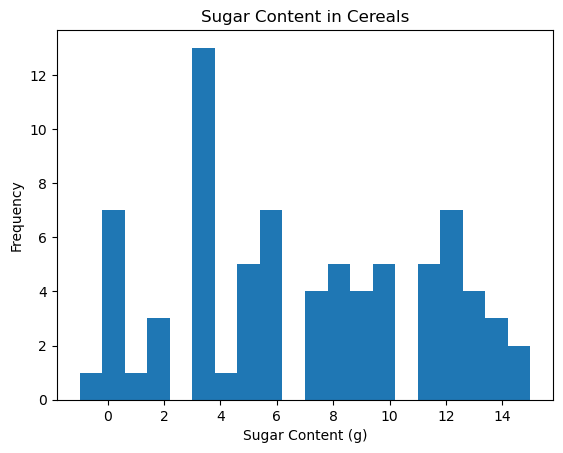

In [12]:
plt.hist(sugar_content, bins=20)
plt.title("Sugar Content in Cereals")
plt.xlabel("Sugar Content (g)")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot: xlabel='mfr', ylabel='count'>

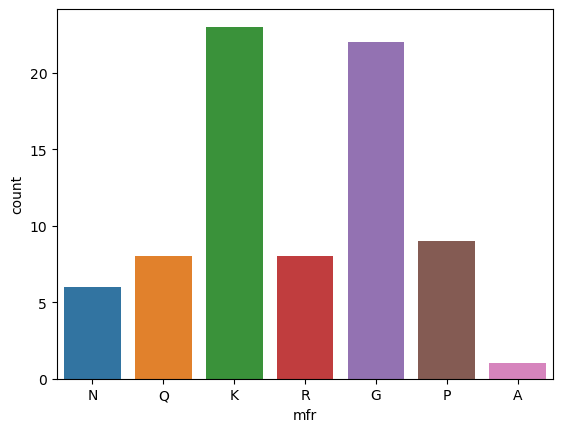

In [13]:
sns.countplot(data = df, x = df.mfr)

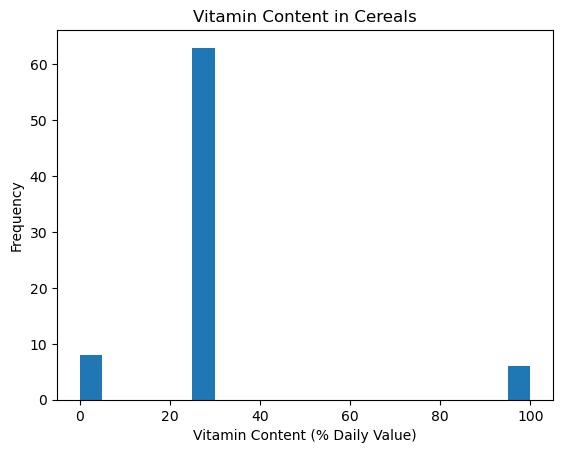

In [14]:
plt.hist(vitamin_content, bins=20)
plt.title("Vitamin Content in Cereals")
plt.xlabel("Vitamin Content (% Daily Value)")
plt.ylabel("Frequency")
plt.show()

In [15]:
xtrain = jo training ke lie values use ho rhi hai(predictor vairables)(for training the model)
xtest = it will contain the predictor values whic will be used to test the trained model
ytrain = will contain the target values which will be used to train the model
ytest = will contains the values which are values to test a model

SyntaxError: invalid syntax (3212988066.py, line 1)

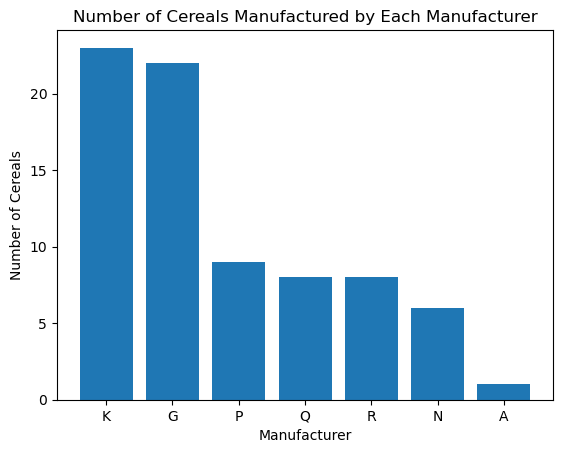

In [16]:
manufacturer_counts = df["mfr"].value_counts()

# Create a bar plot of the manufacturer counts
plt.bar(manufacturer_counts.index, manufacturer_counts.values)
plt.title("Number of Cereals Manufactured by Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cereals")
plt.show()

In [17]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,MFR_Full_Name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


In [18]:
# Load the data from “cereal.csv” and plot histograms of sugar and vitamin
# content across different cereals.
# [Hint: Extract values of a specific column using their labels and use hist method
# of pyplot ]

<AxesSubplot: >

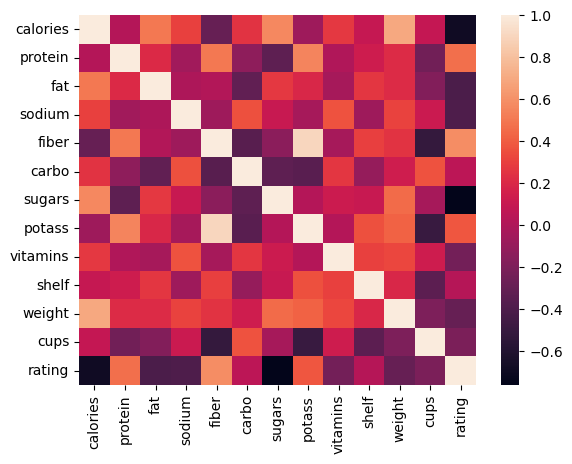

In [19]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='vitamins', ylabel='sugars'>

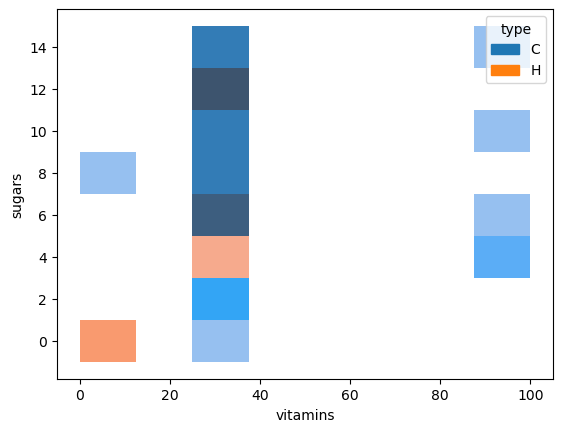

In [20]:
sns.histplot(data = df, x = 'vitamins', y = 'sugars', hue = 'type')

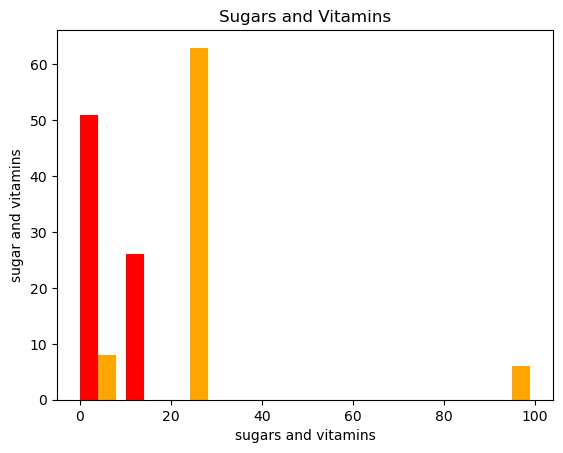

In [21]:
plt.hist([df["sugars"], df["vitamins"]],color = ['red', 'orange'])
plt.title("Sugars and Vitamins")
plt.xlabel("sugars and vitamins")
plt.ylabel("sugar and vitamins")
plt.show()


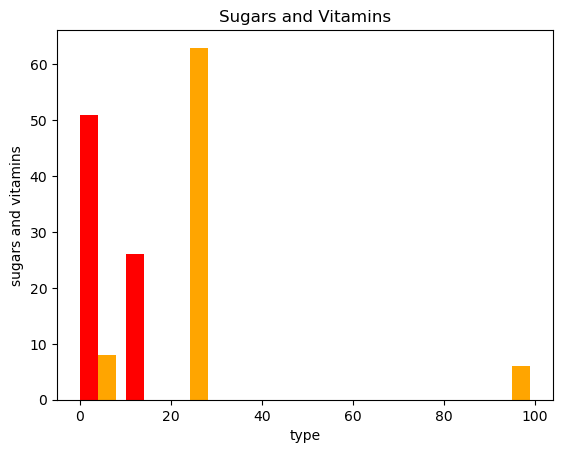

In [22]:
plt.hist([df["sugars"], df["vitamins"]],color = ['red', 'orange'])
plt.title("Sugars and Vitamins")
plt.xlabel("type")
plt.ylabel("sugars and vitamins")
plt.show()

In [23]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,MFR_Full_Name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


In [24]:
x = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups']]
y = df[['rating']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.25 , random_state = 50)

In [25]:
x

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [26]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [27]:
x_train

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
41,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67
42,110,2,1,180,0.0,12.0,12,55,25,2,1.00,1.00
21,110,2,0,220,1.0,21.0,3,30,25,3,1.00,1.00
49,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67
31,110,1,1,280,0.0,15.0,9,45,25,2,1.00,0.75
43,100,4,1,0,0.0,16.0,3,95,25,2,1.00,1.00
20,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00
6,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00
26,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00


In [28]:
clf.predict(x_test)

array([[40.10596535],
       [35.78279057],
       [74.47294881],
       [37.13686133],
       [45.86332519],
       [68.2358851 ],
       [31.07221724],
       [49.12025315],
       [59.64283691],
       [22.39651264],
       [49.51187377],
       [41.50354072],
       [34.1397628 ],
       [44.33085557],
       [49.78744535],
       [38.83974592],
       [30.31335041],
       [53.313813  ],
       [33.98367819],
       [55.33314167],
       [46.65884495],
       [63.00564524],
       [39.24111463],
       [31.43597292],
       [28.74241387],
       [36.52368371],
       [40.56015928],
       [27.75330089],
       [45.81171549],
       [40.40020745],
       [22.73644616],
       [40.91704662],
       [32.20758112],
       [41.01549165],
       [37.03856166],
       [41.99893358],
       [36.47151209],
       [51.59219327],
       [39.7033993 ],
       [37.84059359],
       [30.45084307],
       [28.02576428],
       [50.82839334],
       [18.04285056],
       [36.18755866],
       [93

In [29]:
y_train

,rating
41,45.328074
42,26.734515
21,46.895644
49,40.692320
31,23.804043
43,54.850917
20,64.533816
6,33.174094
26,58.345141
35,21.871292


SyntaxError: invalid syntax (2738366562.py, line 1)